In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data_Urbun(sheet):
    df_urban = {}
    years = ['98', '99', '1400', '1401']
    for year in years:
        file_name = f'U{year}.xlsx'
        sheet_name = f'U{year}{sheet}'
        df = pd.read_excel(file_name, sheet_name = sheet_name)
        df_urban[f'U{year}'] = df
    return df_urban

In [3]:
def load_data_Rural(sheet):
    df_Rural = {}
    years = ['98', '99', '1400', '1401']
    for year in years:
        file_name = f'R{year}.xlsx'
        sheet_name = f'R{year}{sheet}'
        df = pd.read_excel(file_name, sheet_name = sheet_name)
        df_Rural[f'R{year}'] = df
    return df_Rural

In [4]:
Rural_Data = load_data_Rural('Data')
Urbun_Data = load_data_Urbun('Data')

In [5]:
Transportation_Urban = load_data_Urbun('P3S07')
Transportation_Rural = load_data_Rural('P3S07')

In [6]:
living_Data_Urban = load_data_Urbun('P2')
living_Data_Rural = load_data_Rural('P2')

In [7]:
Social_characteristics_Urban = load_data_Urbun('P1')
Social_characteristics_Rural = load_data_Rural('P1')

In [8]:
paid_jobs_Urban = load_data_Urbun('P4S01')
paid_jobs_Rural = load_data_Rural('P4S01')

In [9]:
freelance_jobs_Rural = load_data_Rural('P4S02')
freelance_jobs_Urban = load_data_Urbun('P4S02')

In [10]:
paid_jobs_Urban['U1401']['days_w'] = paid_jobs_Urban['U1401']['days_w'].str.strip()
paid_jobs_Urban['U1401'].loc[paid_jobs_Urban['U1401']['days_w'] == '', 'days_w'] = '0'
paid_jobs_Urban['U1401']['days_w'] = paid_jobs_Urban['U1401']['days_w'].astype(float)

paid_jobs_Rural['R1401']['days_w'] = paid_jobs_Rural['R1401']['days_w'].str.strip()
paid_jobs_Rural['R1401'].loc[paid_jobs_Rural['R1401']['days_w'] == '', 'days_w'] = '0'
paid_jobs_Rural['R1401']['days_w'] = paid_jobs_Rural['R1401']['days_w'].astype(float)


In [11]:
freelance_jobs_Urban['U1401']['days_s'] = freelance_jobs_Urban['U1401']['days_s'].str.strip()
freelance_jobs_Urban['U1401'].loc[freelance_jobs_Urban['U1401']['days_s'] == '', 'days_s'] = '0'
freelance_jobs_Urban['U1401']['days_s'] = freelance_jobs_Urban['U1401']['days_s'].astype(float)

freelance_jobs_Rural['R1401']['days_s'] = freelance_jobs_Rural['R1401']['days_s'].str.strip()
freelance_jobs_Rural['R1401'].loc[freelance_jobs_Rural['R1401']['days_s'] == '', 'days_s'] = '0'
freelance_jobs_Rural['R1401']['days_s'] = freelance_jobs_Rural['R1401']['days_s'].astype(float)


In [12]:
for key, value in paid_jobs_Urban.items() :
    paid_jobs_Urban[key] = value.groupby(['Address', 'Fasl'])[['days_w']].sum().reset_index()
    
for key, value in paid_jobs_Rural.items() :
    paid_jobs_Rural[key] = value.groupby(['Address', 'Fasl'])[['days_w']].sum().reset_index()

In [14]:
for key, value in freelance_jobs_Urban.items() :
    freelance_jobs_Urban[key] = value.groupby(['Address', 'Fasl'])[['days_s']].sum().reset_index()
    
for key, value in freelance_jobs_Rural.items() :
    freelance_jobs_Rural[key] = value.groupby(['Address', 'Fasl'])[['days_s']].sum().reset_index()

In [15]:
years = ['98', '99', '1400', '1401']
days_R = {}
days_U = {}
for year in years :
    df_temp = freelance_jobs_Urban[f'U{year}'].merge(paid_jobs_Urban[f'U{year}'], on = ['Address', 'Fasl'], how = 'outer').fillna(0)
    df_temp['days'] = df_temp['days_s'].astype('int') + df_temp['days_w'].astype('int')
    df_temp.drop(columns = ['days_s', 'days_w'], inplace = True)
    days_U[f'U{year}'] = df_temp
    
for year in years :
    df_temp = freelance_jobs_Rural[f'R{year}'].merge(paid_jobs_Rural[f'R{year}'], on = ['Address', 'Fasl'], how = 'outer').fillna(0)
    df_temp['days'] = df_temp['days_s'].astype('int64') + df_temp['days_w'].astype('int64')
    df_temp.drop(columns = ['days_s', 'days_w'], inplace = True)
    days_R[f'R{year}'] = df_temp

In [16]:
for key, value in Transportation_Urban.items() :
    Transportation_Urban[key]['code'] = value['code'] // 100
    
for key, value in Transportation_Rural.items() :
    Transportation_Rural[key]['code'] = value['code'] // 100

In [21]:
#for key, value in Transportation_Urban.items() :
    #Transportation_Urban[key] = value.groupby(['Address', 'code'])[['value']].sum().reset_index()
    
#for key, value in Transportation_Rural.items() :
    #Transportation_Rural[key] = value.groupby(['Address', 'code'])[['value']].sum().reset_index()

In [22]:
for key, value in living_Data_Urban.items() :
    living_Data_Urban[key] = value[['Address', 'vehicle', 'motorcycle']]
    
for key, value in living_Data_Rural.items() :
    living_Data_Rural[key] = value[['Address', 'vehicle', 'motorcycle']]

In [23]:
for key, value in Urbun_Data.items() :
    Urbun_Data[key] = value[['Address', 'Fasl', 'province']]
    
for key, value in Rural_Data.items() :
    Rural_Data[key] = value[['Address', 'Fasl', 'province']]

In [24]:
members_Urban = {}
members_Rural = {}
for key, value in Social_characteristics_Urban.items():
    members_Urban[key] = value.groupby('Address').size().reset_index(name='members_count')

for key, value in Social_characteristics_Rural.items():
    members_Rural[key] = value.groupby('Address').size().reset_index(name='members_count')

In [25]:
years = ['98', '99', '1400', '1401']
df_temp_R = {}
df_temp_U = {}

for year in years :
    df_R = Transportation_Rural[f'R{year}'].merge(members_Rural[f'R{year}'], how='left', on='Address')
    df_R = df_R.merge(Rural_Data[f'R{year}'],  how='left', on='Address')
    df_R = df_R.merge(living_Data_Rural[f'R{year}'], how = 'left', on = 'Address')
    df_R = df_R.merge(days_R[f'R{year}'], how = 'left', on = ['Address', 'Fasl'])
    df_temp_R[year] = df_R
    
for year in years :
    df_U = Transportation_Urban[f'U{year}'].merge(members_Urban[f'U{year}'], how='left', on='Address')
    df_U = df_U.merge(Urbun_Data[f'U{year}'],  how='left', on='Address')
    df_U = df_U.merge(living_Data_Urban[f'U{year}'], how = 'left', on = 'Address')
    df_U = df_U.merge(days_U[f'U{year}'], how = 'left', on = ['Address', 'Fasl'])
    df_temp_U[year] = df_U

In [26]:
df_final_R = pd.concat((df_temp_R['98'], df_temp_R['99']))
df_final_R = pd.concat((df_final_R, df_temp_R['1400']))
df_final_R = pd.concat((df_final_R, df_temp_R['1401']))
df_final_R['Region'] = 0

df_final_U = pd.concat((df_temp_U['98'], df_temp_U['99']))
df_final_U = pd.concat((df_final_U, df_temp_U['1400']))
df_final_U = pd.concat((df_final_U, df_temp_U['1401']))
df_final_U['Region'] = 1

In [27]:
df_final = pd.concat((df_final_R, df_final_U))
df_final

,Address,code,value,members_count,Fasl,province,vehicle,motorcycle,days,Region
0,20001383908,722,350000,4,2,Markazi,False,True,7.0,0
1,20001383908,732,400000,4,2,Markazi,False,True,7.0,0
2,20001383911,732,370000,2,2,Markazi,False,False,NaN,0
3,20001383915,722,1000000,2,2,Markazi,True,False,5.0,0
4,20001383916,722,1050000,4,2,Markazi,True,False,7.0,0
...,...,...,...,...,...,...,...,...,...,...
28893,13006383835,732,3500000,2,2,Alborz,False,False,7.0,1
28894,13006383838,722,2600000,3,2,Alborz,True,False,12.0,1
28895,13006383838,732,3000000,3,2,Alborz,True,False,12.0,1
28896,13006383841,722,2300000,3,2,Alborz,True,False,6.0,1


In [28]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_final['province'] = LE.fit_transform(df_final['province'])

<Axes: >

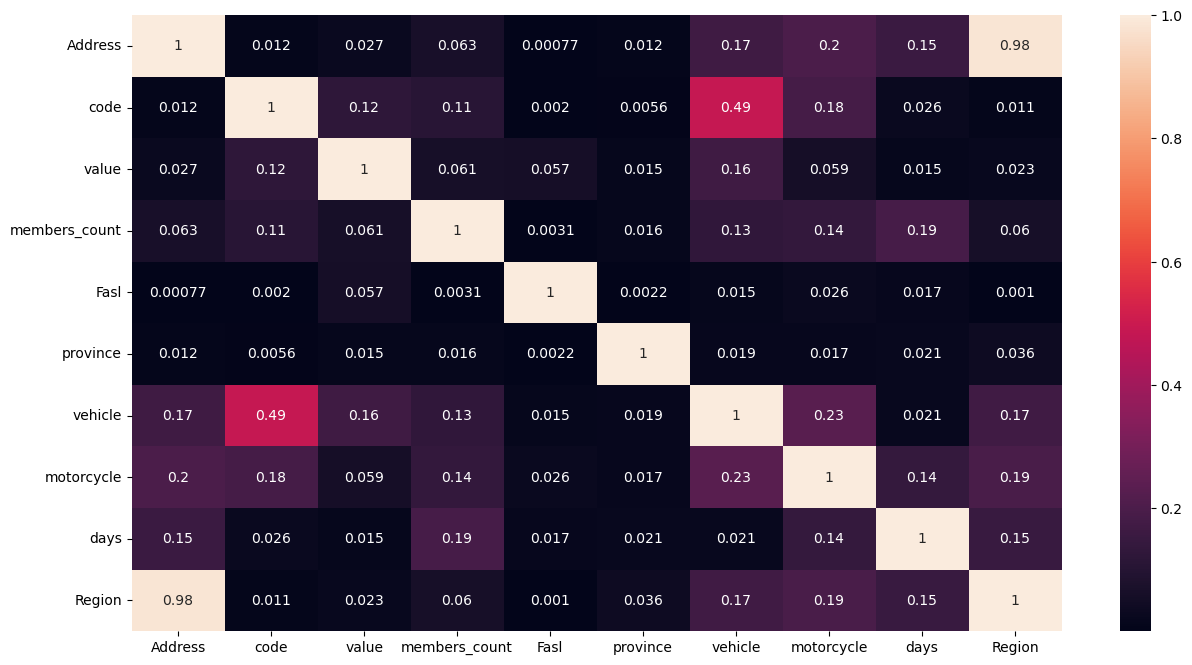

In [29]:
df_final.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(df_final.corr().abs(), annot= True)

In [30]:
Test = df_final[df_final['Fasl'] == 4]
Train = df_final[df_final['Fasl'] != 4]

In [31]:
days_mean = Train['days'].mean()

Test.loc[:, 'days'] = Test['days'].fillna(days_mean)
Train.loc[:, 'days'] = Train['days'].fillna(days_mean)

In [39]:
y = Train['value']
X = Train.drop(columns = ['value'])

In [40]:
X

,Address,code,members_count,Fasl,province,vehicle,motorcycle,days,Region
0,20001383908,722,4,2,22,False,True,7.000000,0
1,20001383908,732,4,2,22,False,True,7.000000,0
2,20001383911,732,2,2,22,False,False,7.958554,0
3,20001383915,722,2,2,22,True,False,5.000000,0
4,20001383916,722,4,2,22,True,False,7.000000,0
...,...,...,...,...,...,...,...,...,...
28893,13006383835,732,2,2,0,False,False,7.000000,1
28894,13006383838,722,3,2,0,True,False,12.000000,1
28895,13006383838,732,3,2,0,True,False,12.000000,1
28896,13006383841,722,3,2,0,True,False,6.000000,1


In [41]:
X['Address'] = X['Address'].astype('int64')

In [42]:
X['Fasl'] = X['Fasl'].astype('int')

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train

,Address,code,members_count,Fasl,province,vehicle,motorcycle,days,Region
18850,22317638417,732,4,3,28,True,False,7.000000,0
9524,11002127027,732,3,2,6,True,False,6.000000,1
16860,22206625726,722,5,3,11,True,False,6.000000,0
14934,22006605926,722,5,2,26,True,False,7.958554,0
5484,10603071935,722,5,2,20,True,False,7.958554,1
...,...,...,...,...,...,...,...,...,...
7316,10806099520,722,3,2,13,True,False,7.958554,1
12282,11503186929,732,3,2,21,False,False,4.000000,1
23530,12603320926,732,3,2,24,False,True,6.000000,1
15401,11801210838,722,4,1,4,True,False,7.958554,1


#### CatBoost

In [45]:
from skopt import BayesSearchCV
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

param_space = {
    'n_estimators': (50, 200),
    'learning_rate': (0.01, 0.2, 'log-uniform'),
    'max_depth': (3, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

bayes_search = BayesSearchCV(estimator=xgb_model, search_spaces=param_space, n_iter=50, cv=5, random_state=42, n_jobs=-1)

bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
              random_state=42,
              search_spaces={'colsample_bytree': (0.6, 1.0),
                             'learning_rate': (0.01, 0.2, 'log-uniform'),
                             'max_depth': (3, 10), 'n_estimators': (50, 200),
                             'subsample': (0.6, 1.0)})

In [46]:
bayes_search.best_estimator_, bayes_search.best_score_

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.024823124915102402,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 0.14287190437316893)

In [47]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(verbose=0)

param_space = {
    'iterations': (50, 200),
    'learning_rate': (0.01, 0.2, 'log-uniform'),
    'depth': (3, 10),
    'l2_leaf_reg': (1, 10, 'log-uniform'),
    'bagging_temperature': (0.0, 1.0)
}

bayes_search_cat = BayesSearchCV(estimator=catboost_model, search_spaces=param_space, n_iter=50, cv=5, random_state=42, n_jobs=-1)

bayes_search_cat.fit(X_train, y_train)


BayesSearchCV(cv=5,
              estimator=<catboost.core.CatBoostRegressor object at 0x000001F736672700>,
              n_iter=32, random_state=42,
              search_spaces={'bagging_temperature': (0.0, 1.0),
                             'depth': (3, 10), 'iterations': (50, 200),
                             'l2_leaf_reg': (1, 10, 'log-uniform'),
                             'learning_rate': (0.01, 0.2, 'log-uniform')})

In [48]:
bayes_search_cat.best_score_

0.13378561099661818

In [49]:
from sklearn.metrics import r2_score

In [50]:
y_predict = bayes_search_cat.best_estimator_.predict(X_test)
r2_score(y_pred=y_predict, y_true=y_test)

0.17374208556006765

#### Random Forest

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)

param_space = {
    'max_depth': (1,10, 20, 30, 50),    
    'min_samples_split': (2, 10, 20),           
    'min_samples_leaf': (1, 10, 20),             
    'max_features': ('sqrt', 'log2') 
}

bayes_search = BayesSearchCV(
    estimator=dt_model,
    search_spaces=param_space,
    n_iter=50,                     
    cv=5,
    random_state=42
    , n_jobs=-1
)

bayes_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 'sqrt', 20, 2] before, using random point [50, 'sqrt', 1, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 'log2', 20, 20] before, using random point [20, 'sqrt', 10, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 'log2', 20, 20] before, using random point [10, 'sqrt', 1, 20]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 'log2', 20, 20] before, using random point [30, 'sqrt', 1, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [30, 'log2', 1, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [1, 'sqrt', 10, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [20, 'sqrt', 20, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [20, 'sqrt', 20, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [1, 'sqrt', 20, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [10, 'log2', 10, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [50, 'log2', 10, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [10, 'sqrt', 10, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [1, 'log2', 20, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [20, 'sqrt', 20, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'log2', 20, 20] before, using random point [10, 'sqrt', 1, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [30, 'log2', 1, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [1, 'sqrt', 10, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [50, 'log2', 10, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [1, 'sqrt', 20, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [10, 'sqrt', 1, 20]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [1, 'log2', 20, 20]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [50, 'log2', 10, 20]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [20, 'log2', 1, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [30, 'log2', 1, 20]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [1, 'sqrt', 20, 20]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [10, 'log2', 1, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [50, 'log2', 10, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [1, 'sqrt', 20, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [30, 'sqrt', 10, 20]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [20, 'sqrt', 10, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [20, 'sqrt', 10, 10]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [30, 'sqrt', 1, 20]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [30, 'log2', 1, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [30, 'log2', 10, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [20, 'sqrt', 1, 20]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [20, 'sqrt', 1, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [1, 'log2', 20, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [50, 'sqrt', 1, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [30, 'log2', 1, 20]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [30, 'log2', 20, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [20, 'sqrt', 10, 20]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [1, 'sqrt', 20, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


d:\miniconda3\envs\bootcamp\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 'sqrt', 20, 2] before, using random point [50, 'log2', 20, 2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
              n_iter=100, random_state=42, scoring='r2',
              search_spaces={'max_depth': (1, 10, 20, 30, 50),
                             'max_features': ('sqrt', 'log2'),
                             'min_samples_leaf': (1, 10, 20),
                             'min_samples_split': (2, 10, 20)},
              verbose=1)

In [53]:
bayes_search.best_score_

0.13093906395785182